In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfre1 = pd.DataFrame(pd.read_csv("RDC_InventoryCoreMetrics_Metro_Hist.csv"))

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dfre1.shape

(39001, 35)

# EVICTION DATA (secondary data source)

## E X P L O R A T I O N

### Data Shape & Exploration

In [6]:
dfe1 = pd.DataFrame(pd.read_csv("cities.csv"))

In [7]:
dfe1.tail()

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
502867,5686737,2012,Y-O Ranch,Wyoming,124.0,0.0,14.99,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
502868,5686737,2013,Y-O Ranch,Wyoming,124.0,0.0,15.49,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
502869,5686737,2014,Y-O Ranch,Wyoming,124.0,0.0,15.82,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
502870,5686737,2015,Y-O Ranch,Wyoming,124.0,0.0,16.15,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
502871,5686737,2016,Y-O Ranch,Wyoming,124.0,0.0,16.48,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [8]:
dfe1.shape

(502872, 27)

### What deos the metro area data series look like?

In [11]:
dfe1.name.describe()

count          26160
unique          1541
top       San Miguel
freq              34
Name: name, dtype: object

### Check to see that states look as I'd expect

In [11]:
# dfe1['parent-location'].describe()
dfe1['parent-location'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### All columns

In [26]:
list(dfe1.columns.values)

['GEOID',
 'year',
 'name',
 'parent-location',
 'population',
 'poverty-rate',
 'renter-occupied-households',
 'pct-renter-occupied',
 'median-gross-rent',
 'median-household-income',
 'median-property-value',
 'rent-burden',
 'pct-white',
 'pct-af-am',
 'pct-hispanic',
 'pct-am-ind',
 'pct-asian',
 'pct-nh-pi',
 'pct-multiple',
 'pct-other',
 'eviction-filings',
 'evictions',
 'eviction-rate',
 'eviction-filing-rate',
 'low-flag',
 'imputed',
 'subbed']

### Take a closer look at median household income series

In [27]:
dfe1['median-household-income'].describe()

count    443172.000000
mean      46619.499294
std       23966.419786
min           0.000000
25%       31723.000000
50%       41000.000000
75%       54275.000000
max      250001.000000
Name: median-household-income, dtype: float64

### Filter dataframe down to explore metro area names, populations, years, median gross rent, and eviction filings

In [376]:
dfe2 = dfe1[['year', 'name', 'parent-location', 'population', 'median-gross-rent', 'eviction-filings', ]]
dfe3 = dfe2[dfe2.name == 'Oakland'].head(50)
dfe3

,year,name,parent-location,population,median-gross-rent,eviction-filings
49656,2000,Oakland,California,399484.0,696.0,1949.96
49657,2001,Oakland,California,399484.0,696.0,2161.96
49658,2002,Oakland,California,399484.0,696.0,2076.94
49659,2003,Oakland,California,399484.0,696.0,1895.97
49660,2004,Oakland,California,399484.0,696.0,1667.00
49661,2005,Oakland,California,398793.0,992.0,1594.96
49662,2006,Oakland,California,398793.0,992.0,1740.99
49663,2007,Oakland,California,398793.0,992.0,2100.95
49664,2008,Oakland,California,398793.0,992.0,2578.89
49665,2009,Oakland,California,398793.0,992.0,2349.96


### Plot median gross rent and eviction filings in a scatter plot

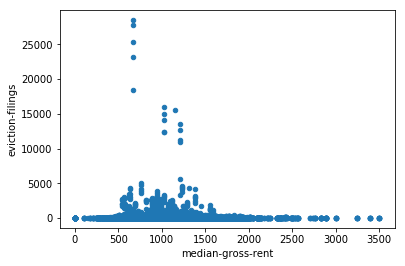

In [120]:
# dfe2_plt = plt.scatter('median-gross-rent', 'eviction-filings', data=dfe2)
dfe2_plt = dfe2.plot.scatter(x='median-gross-rent', y='eviction-filings')

## A N A L Y S I S

### Question 2: How does eviction rate change with cost of rent?

### Hypothesis: When cost of rent changes, eviction rate changes proportionately in the same direction. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Text(0.5,1,'Eviction Rate % Change YoY vs. Median Gross Rent % Change YoY, 2009-2011')

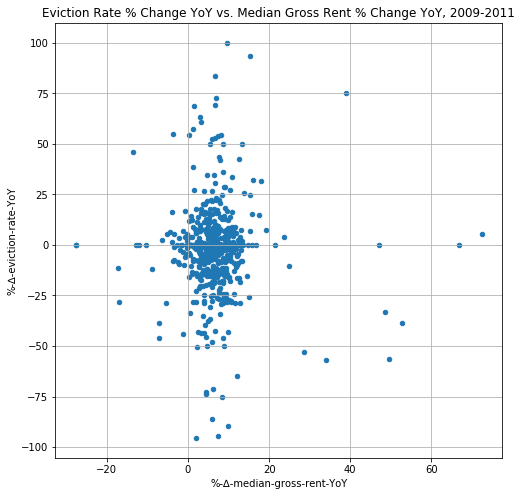

In [14]:
# Create another filtered dataframe with just the columns of interest
dfe3 = dfe1[['year', 'name', 'parent-location', 'population', 'median-household-income','median-gross-rent', 'eviction-rate']]
# dfe3

# Create another filtered dataframe with rows filtered to exclude areas with missing population data and population less than 100000
dfe4 = dfe3[(pd.notnull(dfe3['population'])) & (dfe3['population'] >= 100000)]
# dfe4.head(10)

# Create new datframe filtered for just 2009, 2010, and 2011, the years across which we can look at YoY ∆s for variables of interest
# Add two series to the dataframe that look at the % change YoY for median gross rent, eviction rate, and median household income
dfe5 = dfe4[(dfe4.year == 2009) | (dfe4.year == 2010) | (dfe4.year == 2011)]
dfe5['%-∆-median-gross-rent-YoY'] = dfe5['median-gross-rent'].pct_change() * 100
dfe5['%-∆-eviction-rate-YoY'] = dfe5['eviction-rate'].pct_change() * 100
dfe5['%-∆-median-household-income-YoY'] = dfe5['median-household-income'].pct_change() * 100

# Create a new dataframe that filters out 2009 data now as we're only concerned with ∆s YoY and 2009 data is meaningless
# Rid the dataset of cases in which the eviction rate YoY > 100% (outliers)
dfe6 = dfe5.loc[(dfe5.year > 2009) & (dfe5['%-∆-eviction-rate-YoY'] <= 100), :]

# Plot the data in a scatter plot
dfe6.plot.scatter(x='%-∆-median-gross-rent-YoY', y='%-∆-eviction-rate-YoY', grid=True, figsize=(8,8))
plt.title('Eviction Rate % Change YoY vs. Median Gross Rent % Change YoY, 2009-2011')


In [15]:
dfe6.shape

(563, 10)

### Take an exploratory look at the relationship between median household income and median gross rent YoY changes

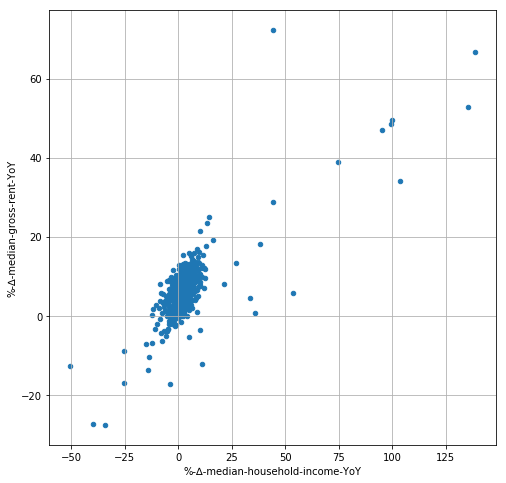

In [374]:
dfe6.plot.scatter(x='%-∆-median-household-income-YoY', y='%-∆-median-gross-rent-YoY', grid=True, figsize=(8,8))

In [330]:
# Describe dfre6 columns
dfe6[['%-∆-median-gross-rent-YoY', '%-∆-eviction-rate-YoY']].describe()

,%-∆-median-gross-rent-YoY,%-∆-eviction-rate-YoY
count,563.000000,563.000000
mean,6.454951,-1.945748
std,7.632659,21.974647
min,-27.622842,-95.522388
25%,3.327228,-10.156951
50%,6.033789,0.000000
75%,8.868411,5.377174
max,72.340426,100.000000


In [85]:
dfe6['median-gross-rent-YoY'].describe()

count    65.000000
mean      7.920021
std       4.361280
min      -3.369673
25%       5.046481
50%       7.540703
75%      10.452962
max      23.583934
Name: median-gross-rent-YoY, dtype: float64

In [86]:
dfe6['eviction-rate-YoY'].describe()

count    65.000000
mean     -3.371042
std      16.109430
min     -94.736842
25%      -6.060606
50%      -1.190476
75%       3.101920
max      25.714286
Name: eviction-rate-YoY, dtype: float64

### Move toward the quartiled graph with each of the quadrants set up below

### Question: describe the frequency of occurrence and other general stats for cases in which %∆ median gross rent YoY was +/- and %∆ eviction rate YoY was +/-?

### Quadrant 1

In [338]:
dfe6_q1 = dfe6[dfe6['%-∆-eviction-rate-YoY'] >= 0][dfe6['%-∆-median-gross-rent-YoY'] < 0]
# dfe6_q1.describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [339]:
dfe6_q1[['%-∆-median-gross-rent-YoY', '%-∆-eviction-rate-YoY']].describe()

,%-∆-median-gross-rent-YoY,%-∆-eviction-rate-YoY
count,23.000000,23.000000
mean,-6.328532,7.645103
std,7.861317,14.344970
min,-27.622842,0.000000
25%,-8.389279,0.000000
50%,-3.595506,2.185792
75%,-1.319929,6.101127
max,-0.137363,54.794521


### Quadrant 2

In [341]:
dfe6_q2 = dfe6[dfe6['%-∆-eviction-rate-YoY'] >= 0][dfe6['%-∆-median-gross-rent-YoY'] >= 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [342]:
dfe6_q2[['%-∆-median-gross-rent-YoY', '%-∆-eviction-rate-YoY']].describe()

,%-∆-median-gross-rent-YoY,%-∆-eviction-rate-YoY
count,276.000000,276.000000
mean,7.398456,11.152033
std,7.345263,17.288813
min,0.000000,0.000000
25%,4.010642,0.000000
50%,6.324232,5.158382
75%,9.127070,14.384010
max,72.340426,100.000000


### Quadrant 3

In [344]:
dfe6_q3 = dfe6[dfe6['%-∆-eviction-rate-YoY'] < 0][dfe6['%-∆-median-gross-rent-YoY'] < 0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [345]:
dfe6_q3[['%-∆-median-gross-rent-YoY', '%-∆-eviction-rate-YoY']].describe()

,%-∆-median-gross-rent-YoY,%-∆-eviction-rate-YoY
count,18.000000,18.000000
mean,-4.660519,-15.044291
std,5.207397,15.045047
min,-17.273431,-46.292948
25%,-6.602533,-24.305556
50%,-2.883722,-8.768190
75%,-1.097211,-4.781171
max,-0.104822,-0.877193


### Quadrant 4

In [346]:
dfe6_q4 = dfe6[dfe6['%-∆-eviction-rate-YoY'] < 0][dfe6['%-∆-median-gross-rent-YoY'] >= 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [347]:
dfe6_q4[['%-∆-median-gross-rent-YoY', '%-∆-eviction-rate-YoY']].describe()

,%-∆-median-gross-rent-YoY,%-∆-eviction-rate-YoY
count,246.000000,246.000000
mean,7.404915,-16.579095
std,6.270373,17.563708
min,0.210970,-95.522388
25%,4.242948,-20.872394
50%,6.383853,-11.583184
75%,8.889968,-5.061948
max,52.803738,-0.161812


### Create the plot and axes to map each of these 4 quadrants onto an axes
### This will help visualize the 4 combinations of direction each of these variables can move (++, +-, -+, --)

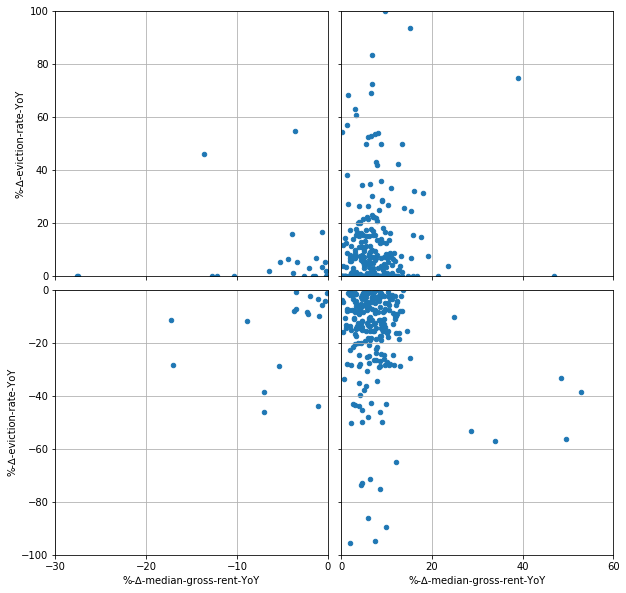

In [348]:
# Create the plot with four windows and plot each quadrant
fig_dfe6_q = plt.figure(figsize = (10,10))

# Create the axes and map them to the subplots 
ax1 = fig_dfe6_q.add_subplot(2, 2, 1)
ax2 = fig_dfe6_q.add_subplot(2, 2, 2)
ax3 = fig_dfe6_q.add_subplot(2, 2, 3)
ax4 = fig_dfe6_q.add_subplot(2, 2, 4)

# Plot first axes scatterplot
dfe6_q1.plot.scatter(x='%-∆-median-gross-rent-YoY', y='%-∆-eviction-rate-YoY', ax=ax1, legend=False, xticks=[-30,-20,-10,0], xlim=[-30,0], ylim=[0,100], grid=True)

# Modify first axes for readibility
ax1.xaxis.label.set_visible(False)
ax1.get_xaxis().set_ticklabels([])

# Plot second axes scatterplot
dfe6_q2.plot.scatter(x='%-∆-median-gross-rent-YoY', y='%-∆-eviction-rate-YoY', ax=ax2, legend=False, xticks=[0,20,40,60], xlim=[0,60], ylim=[0,100], grid=True)

# Modify first axes for readibility
ax2.xaxis.label.set_visible(False)
ax2.get_xaxis().set_ticklabels([])
ax2.yaxis.label.set_visible(False)
ax2.get_yaxis().set_ticklabels([])

# Plot third axes scatterplot
dfe6_q3.plot.scatter(x='%-∆-median-gross-rent-YoY', y='%-∆-eviction-rate-YoY', ax=ax3, legend=False, xticks=[-30,-20,-10,0], xlim=[-30,0], ylim=[-100,0], grid=True)

# Plot fourth axes scatterplot
dfe6_q4.plot.scatter(x='%-∆-median-gross-rent-YoY', y='%-∆-eviction-rate-YoY', ax=ax4, legend=False, xticks=[0,20,40,60], xlim=[0,60], ylim=[-100,0], grid=True)

# Modify fourth axes for readibility
ax4.yaxis.label.set_visible(False)
ax4.get_yaxis().set_ticklabels([])

# Change plot spacing between x- and y-axis
fig_dfe6_q.subplots_adjust(hspace=0.05, wspace=0.05)
# plt.title("Quadrants: 'Eviction Rate % Change YoY vs. Median Gross Rent % Change YoY, 2009-2011'")


### Create a dataframe identical to the one plotted above but with %∆ median household income included

In [19]:
# Filter dataframe down to pop < 100,000 and our target years just like the analysis earlier
dfe7 = dfe1[['year', 'name', 'parent-location', 'population', 'median-gross-rent', 'eviction-rate', 'median-household-income']]
dfe8 = dfe7[(pd.notnull(dfe7['population'])) & (dfe7['population'] >= 100000)]
dfe9 = dfe8[(dfe8.year == 2009) | (dfe8.year == 2010) | (dfe8.year == 2011)]

# Add the %∆ YoY columns
dfe9['median-gross-rent-YoY'] = dfe9['median-gross-rent'].pct_change() * 100
dfe9['eviction-rate-YoY'] = dfe9['eviction-rate'].pct_change() * 100
dfe9['median-household-income-YoY'] = dfe9['median-household-income'].pct_change() * 100

# Filter out meaningless 2009 year data
dfe10 = dfe9.loc[(dfe9.year > 2009) & (dfe9['eviction-rate-YoY'] <= 100), :]

# dfe10.head()

dfe10['median-household-income-YoY'].describe()
# dfe10['median-household-income'].plot.hist(bins=50, figsize=(15,7), xticks=[-10, 0, 10], xlim=[-10, 10])



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

count    563.000000
mean       3.142506
std       13.853509
min      -50.717910
25%       -0.771613
50%        1.738389
75%        4.413827
max      138.746715
Name: median-household-income-YoY, dtype: float64

### In the analysis, we'll want to categorize the %∆ median household income. Use these ranges and these labels to work toward getting that cut of data into the dataframe and then plotting this variable (point color) onto axes

In [21]:
# These represent roughly the min, first quartile, second quartile, third quartile, and max from the description above
ranges = [-51,-0.77,1.73,4.41,138.74]

# Use these for the labels of the categories for %∆ median-household-income-YoY
labels = ['< 25th Percentile - Very Poor','25th >< 50th Percentile - Poor',\
          '50th >< 75th Percentile - Good','> 75th Percentile - Very Good']

In [22]:
# Cut the median-household-income-YoY variable into categories variable, median-household-income-YoY-categories
dfe10['median-household-income-YoY-categories'] = pd.cut(dfe10['median-household-income-YoY'], ranges, labels=labels).astype('category')
dfe10.head(15)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,name,parent-location,population,median-gross-rent,eviction-rate,median-household-income,median-gross-rent-YoY,eviction-rate-YoY,median-household-income-YoY,median-household-income-YoY-categories
826,2010,Birmingham,Alabama,212237.0,717.0,1.43,31467.0,6.696429,83.333333,-0.747540,25th >< 50th Percentile - Poor
827,2011,Birmingham,Alabama,212211.0,728.0,2.41,31061.0,1.534170,68.531469,-1.290241,< 25th Percentile - Very Poor
4625,2010,Huntsville,Alabama,180105.0,705.0,2.61,48632.0,12.800000,-18.437500,2.421970,50th >< 75th Percentile - Good
4626,2011,Huntsville,Alabama,185594.0,733.0,2.24,48775.0,3.971631,-14.176245,0.294045,25th >< 50th Percentile - Poor
5980,2010,Mobile,Alabama,195111.0,746.0,2.59,38722.0,11.343284,-24.489796,7.061491,> 75th Percentile - Very Good
5981,2011,Mobile,Alabama,194669.0,770.0,3.05,38776.0,3.217158,17.760618,0.139456,25th >< 50th Percentile - Poor
6031,2010,Montgomery,Alabama,205764.0,798.0,3.24,43390.0,10.526316,-28.476821,2.465404,50th >< 75th Percentile - Good
6032,2011,Montgomery,Alabama,202967.0,814.0,3.17,42927.0,2.005013,-2.160494,-1.067066,< 25th Percentile - Very Poor
10166,2010,Anchorage,Alaska,291826.0,1104.0,NaN,76495.0,11.627907,0.000000,9.043349,> 75th Percentile - Very Good
10167,2011,Anchorage,Alaska,299107.0,1197.0,NaN,78326.0,8.423913,0.000000,2.393620,50th >< 75th Percentile - Good


### Again, our quadrants, but this time, including median-household-income-YoY

### Quadrant 1

In [23]:
dfe10_q1 = dfe10[dfe10['eviction-rate-YoY'] >= 0][dfe10['median-gross-rent-YoY'] < 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
dfe10_q1[['median-gross-rent-YoY', 'eviction-rate-YoY', 'median-household-income-YoY']].describe()

,median-gross-rent-YoY,eviction-rate-YoY,median-household-income-YoY
count,23.000000,23.000000,23.000000
mean,-6.328532,7.645103,-7.702632
std,7.861317,14.344970,14.835858
min,-27.622842,0.000000,-50.717910
25%,-8.389279,0.000000,-7.856498
50%,-3.595506,2.185792,-4.137381
75%,-1.319929,6.101127,-0.724068
max,-0.137363,54.794521,11.087709


In [26]:
dfe10_q1.groupby(by='median-household-income-YoY-categories').count()['name']

median-household-income-YoY-categories
< 25th Percentile - Very Poor     17
25th >< 50th Percentile - Poor     3
50th >< 75th Percentile - Good     1
> 75th Percentile - Very Good      2
Name: name, dtype: int64

### Quadrant 2

In [27]:
dfe10_q2 = dfe10[dfe10['eviction-rate-YoY'] >= 0][dfe10['median-gross-rent-YoY'] >= 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [28]:
dfe10_q2[['median-gross-rent-YoY', 'eviction-rate-YoY', 'median-household-income-YoY']].describe()

,median-gross-rent-YoY,eviction-rate-YoY,median-household-income-YoY
count,276.000000,276.000000,276.000000
mean,7.398456,11.152033,3.943067
std,7.345263,17.288813,12.259397
min,0.000000,0.000000,-12.021470
25%,4.010642,0.000000,0.069742
50%,6.324232,5.158382,2.317159
75%,9.127070,14.384010,4.561693
max,72.340426,100.000000,138.746715


In [29]:
dfe10_q2.groupby(by='median-household-income-YoY-categories').count()['name']

median-household-income-YoY-categories
< 25th Percentile - Very Poor     48
25th >< 50th Percentile - Poor    71
50th >< 75th Percentile - Good    80
> 75th Percentile - Very Good     76
Name: name, dtype: int64

### Quadrant 3

In [30]:
dfe10_q3 = dfe10[dfe10['eviction-rate-YoY'] < 0][dfe10['median-gross-rent-YoY'] < 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [31]:
dfe10_q3[['median-gross-rent-YoY', 'eviction-rate-YoY', 'median-household-income-YoY']].describe()

,median-gross-rent-YoY,eviction-rate-YoY,median-household-income-YoY
count,18.000000,18.000000,18.000000
mean,-4.660519,-15.044291,-7.258272
std,5.207397,15.045047,8.317511
min,-17.273431,-46.292948,-25.363137
25%,-6.602533,-24.305556,-10.652957
50%,-2.883722,-8.768190,-4.492995
75%,-1.097211,-4.781171,-3.260397
max,-0.104822,-0.877193,5.085306


In [32]:
dfe10_q3.groupby(by='median-household-income-YoY-categories').count()['name']

median-household-income-YoY-categories
< 25th Percentile - Very Poor     16
25th >< 50th Percentile - Poor     0
50th >< 75th Percentile - Good     1
> 75th Percentile - Very Good      1
Name: name, dtype: int64

### Quadrant 4

In [33]:
dfe10_q4 = dfe10[dfe10['eviction-rate-YoY'] < 0][dfe10['median-gross-rent-YoY'] >= 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [34]:
dfe10_q4[['median-gross-rent-YoY', 'eviction-rate-YoY', 'median-household-income-YoY']].describe()

,median-gross-rent-YoY,eviction-rate-YoY,median-household-income-YoY
count,246.000000,246.000000,246.000000
mean,7.404915,-16.579095,4.019324
std,6.270373,17.563708,15.049800
min,0.210970,-95.522388,-10.502550
25%,4.242948,-20.872394,-0.724718
50%,6.383853,-11.583184,1.630742
75%,8.889968,-5.061948,4.278046
max,52.803738,-0.161812,135.146757


In [35]:
dfe10_q4.groupby(by='median-household-income-YoY-categories').count()['name']

median-household-income-YoY-categories
< 25th Percentile - Very Poor     60
25th >< 50th Percentile - Poor    66
50th >< 75th Percentile - Good    59
> 75th Percentile - Very Good     61
Name: name, dtype: int64

### -- Didn't end up using this, but a plot in seaborn --  

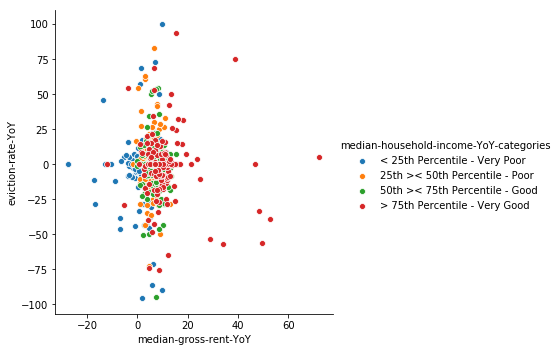

In [36]:
import seaborn as sns

sns.pairplot(x_vars=['median-gross-rent-YoY'], y_vars=['eviction-rate-YoY'], data=dfe10, hue='median-household-income-YoY-categories', height=5)


### Scatterplot identical to one above with just median-gross-rent-YoY and eviction-rate-YoY, but now it modified point color of median-household-income-YoY-categories based on their categorical values

### Goal is to look at distribution of reds/greens across the four quadrants and also to look at eviction rate by median-household-income-YoY-categories

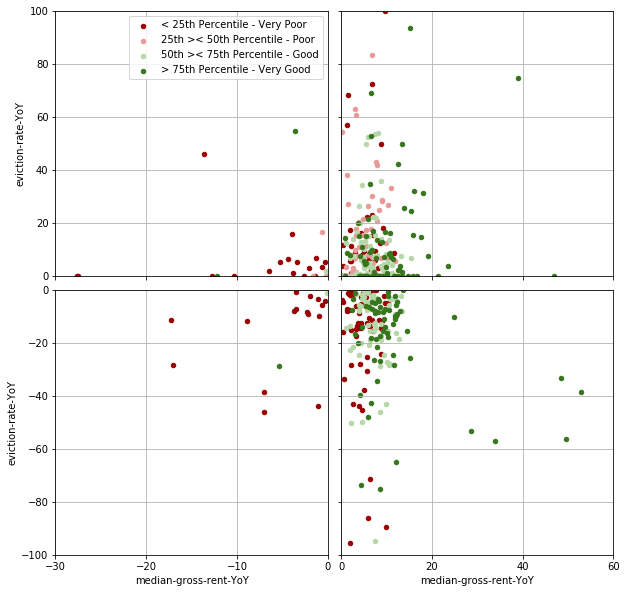

In [37]:
# Create the plot with four windows and plot each quadrant
fig_dfe10_q = plt.figure(figsize = (10,10))

# Map axes to subplots
ax1 = fig_dfe10_q.add_subplot(2, 2, 1)
ax2 = fig_dfe10_q.add_subplot(2, 2, 2)
ax3 = fig_dfe10_q.add_subplot(2, 2, 3)
ax4 = fig_dfe10_q.add_subplot(2, 2, 4)

# Define variables
var_1 = 'median-gross-rent-YoY'
var_2 = 'eviction-rate-YoY'
var_3 = 'median-household-income-YoY-categories'

# Define labels and the colors I want them to be mapped as
labels_colors = [('< 25th Percentile - Very Poor', '#990000'), ('25th >< 50th Percentile - Poor', '#ea9999'),
                 ('50th >< 75th Percentile - Good', '#b6d7a8'), ('> 75th Percentile - Very Good', '#38761d')]

# A short script that iterates through the labels_colors and through the axes and
# plots each label/color on each axes as it itates through
# The try/except structure is necessary because I need the program to continue even if there isn't a particular
# label/color in a particular quadrant. Would raise ValueError otherwise. 
for l_c in labels_colors:
    try:
        dfe10_q1[dfe10_q1[var_3] == l_c[0]].plot.scatter(x=var_1, y=var_2, ax=ax1,\
                                                     xticks=[-30,-20,-10,0], xlim=[-30,0], ylim=[0,100],\
                                                     color=l_c[1], label=l_c[0], grid=True)
    except ValueError:
        continue
    try:
        dfe10_q2[dfe10_q2[var_3] == l_c[0]].plot.scatter(x=var_1, y=var_2, ax=ax2, legend=False, \
                                                     xticks=[0,20,40,60], xlim=[0,60], ylim=[0,100],\
                                                     color=l_c[1], label=l_c[0], grid=True)
    except ValueError:
        continue
    try:
        dfe10_q3[dfe10_q3[var_3] == l_c[0]].plot.scatter(x=var_1, y=var_2, ax=ax3, legend=False,\
                                                         xticks=[-30,-20,-10,0], xlim=[-30,0], ylim=[-100,0],\
                                                         color=l_c[1], label=l_c[0], grid=True)
    except ValueError:
        continue
    try:
        dfe10_q4[dfe10_q4[var_3] == l_c[0]].plot.scatter(x=var_1, y=var_2, ax=ax4, legend=False,\
                                                         xticks=[0,20,40,60], xlim=[0,60], ylim=[-100,0],\
                                                         color=l_c[1], label=l_c[0], grid=True)
    except ValueError:
        continue
    

# Mass modify the axes for readibility
ax1.xaxis.label.set_visible(False)
ax1.get_xaxis().set_ticklabels([])
ax2.xaxis.label.set_visible(False)
ax2.get_xaxis().set_ticklabels([])
ax2.yaxis.label.set_visible(False)
ax2.get_yaxis().set_ticklabels([])
ax4.yaxis.label.set_visible(False)
ax4.get_yaxis().set_ticklabels([])

# Adjust axis spacing
fig_dfe10_q.subplots_adjust(hspace=0.05, wspace=0.05)


### One more graph in here based on dfe5
### A line graph that shows the relationship between median gross rent and eviction rate over 2009-11

In [39]:
dfe5.describe()

,year,population,median-household-income,median-gross-rent,eviction-rate,%-∆-median-gross-rent-YoY,%-∆-eviction-rate-YoY,%-∆-median-household-income-YoY
count,860.000000,8.600000e+02,860.000000,860.000000,725.000000,859.000000,845.000000,859.000000
mean,2010.046512,3.028597e+05,52609.305814,974.394186,3.592910,1.275969,inf,2.164436
std,0.818969,5.944604e+05,16014.722290,262.244430,2.594985,15.211730,NaN,21.922975
min,2009.000000,1.000270e+05,25764.000000,540.000000,0.000000,-52.954676,-100.000000,-61.025137
25%,2009.000000,1.209138e+05,41846.000000,768.000000,1.660000,-3.407118,-12.000000,-3.195516
50%,2010.000000,1.681340e+05,49188.000000,916.500000,3.200000,4.539386,0.000000,1.434135
75%,2011.000000,2.586635e+05,60740.000000,1131.000000,4.940000,8.466730,12.473573,5.210103
max,2011.000000,8.426743e+06,114098.000000,1903.000000,17.150000,72.340426,inf,138.746715


In [40]:
# Take mean of each column each year and sort the values
dfe5_year_mean = dfe5[['year', 'population', 'median-gross-rent', 'eviction-rate']].groupby(by='year').mean().sort_values('year')
dfe5_year_mean

,population,median-gross-rent,eviction-rate
year,,,
2009,310981.249071,903.301115,3.667013
2010,302869.255319,981.145390,3.680248
2011,295780.656958,1030.122977,3.441111


### Plot the figure

Text(0,0.5,'eviction-rate')

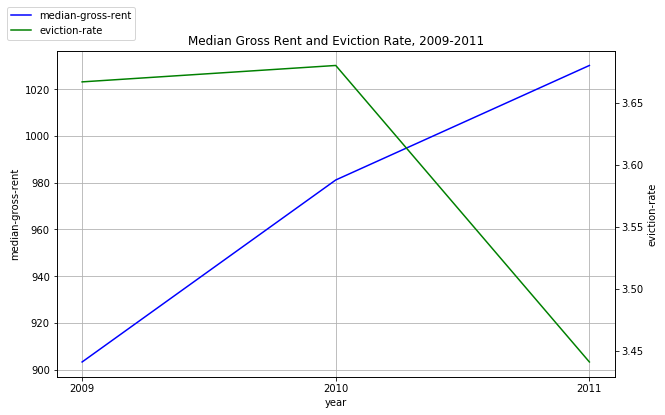

In [368]:
# create the figure
fig_dfe5_year_mean = plt.figure(figsize = (10,6))

# create the inital axes
fig_dfe5_year_mean_ax1 = fig_dfe5_year_mean.add_subplot(1, 1, 1)


# plot the first variable on the initial axes
dfe5_year_mean['median-gross-rent'].plot(ax=fig_dfe5_year_mean_ax1, xticks=[2009, 2010, 2011], style='b-', grid=True)
fig_dfe5_year_mean_ax1.set_ylabel('median-gross-rent')

# create the second y-axis
fig_dfe5_year_mean_ax2 = fig_dfe5_year_mean_ax1.twinx()
fig_dfe5_year_mean_ax2.spines['right'].set_position(('axes', 1.0))
dfe5_year_mean['eviction-rate'].plot(ax=fig_dfe5_year_mean_ax2, xticks=[2009, 2010, 2011], style='g-')

# create the legend
fig_dfe5_year_mean_ax1.legend([fig_dfe5_year_mean_ax1.get_lines()[0], fig_dfe5_year_mean_ax2.get_lines()[0]],\
           ['median-gross-rent','eviction-rate'], bbox_to_anchor=(0.15, 1.15))

# Create the title and y-axis label
plt.title('Median Gross Rent and Eviction Rate, 2009-2011')
plt.ylabel('eviction-rate')

### Scratch thinking

In [ ]:
# Hypothesis 3: % ∆ YoY median gross rent varies directly with % ∆ YoY eviction rate
# Finding: not supported in this data
# Explanation: 
# Over this time period, we see that for most locations, median gross increased modestly (mean at 6.5% increase)
# The eviction rate, however, didn't clearly vary directly with this increase in median rent
# Instead, it dipped on average
# Why?
# Alternative hypothesis: rent is increasing because the economy is doing well during this period
# With the economy doing well, fewer people are being evicted 
# You might actually expect to see the reverse trend:
# More evictions went rental rates are decreasing assuming landlords are decreasing rent to keep tenants who are struggling to stay


In [ ]:
# Becauase of limitations of median gross rent field
# this plot limits its data to YoY % changes in eviction rate and median gross rent in 2010 and 2011
# We only have data for changes in rent that fluctuate YoY consistently for 2009, 2010, and 2011
# Because the median rent data is otherwise stagnant for multi-year increments of time

# Here's another interesting framing of this question:
# For all cases we have here, in how many cases did rent increase (what %)
# For that set of cases (in which rent increased), in how many cases did evictions also increase? Decrease? %s?
# These answers may shed some light on hypothesis 3
# Another factor that might be worth considering...
# Let's say that for 80% of cases in which median gross rent YoY increased, eviction rates also increased
# (Meaning in 20% of cases, evictions decreased)
# Does that lend more credibility to the idea that there's a direct relationship there?
# To dig in further, would be worth investigating the relationship between YoY evictions rates and time
# Were those eviction rates going up anyway?
# Can't really do this, actually... It could obviously still be argued that if they are going up, they are because of rental rate increases
